# vote_coefficients_0x274554EB289004e15A7679123901B7F070dDa0fa_1


In [115]:
import os
from pathlib import Path
import numpy as np

import pandas as pd

from sbdata.FlipsideApi import FlipsideApi

# Set path to data folder
current_dir = Path(os.getcwd())
PATH_TO_EXPORT = os.path.join(current_dir.parent.parent, 'tx_data', 'all_beta_rounds')
DATA_DIR = os.path.join(current_dir.parent.parent, 'data-regen-rangers')
DATA_DIR_GITCOIN = os.path.join(current_dir.parent.parent, 'data-gitcoin')
CSV_GITCOIN_GRANTS = 'vote_coefficients_0x274554EB289004e15A7679123901B7F070dDa0fa_1.csv'

# read the address from oss grant

api_key = os.environ['FLIPSIDE_API_KEY']
flipside_api = FlipsideApi(api_key, max_address=400)
PATH_TO_VOTES = os.path.join(DATA_DIR, "votes_baoki.csv")
PATH_TO_GRANTS = os.path.join(DATA_DIR, "all-allo-rounds.csv")
PATH_TO_PROJECTS = os.path.join(DATA_DIR, "projects_QmQurt.csv")
PATH_TO_VOTES_GITCOIN = os.path.join(DATA_DIR_GITCOIN, CSV_GITCOIN_GRANTS)

# load data
df_votes = pd.read_csv(PATH_TO_VOTES_GITCOIN)
df_grants = pd.read_csv(PATH_TO_GRANTS)
df_application = pd.read_csv(PATH_TO_PROJECTS)
# Lowercase all addresses because flipside api return lowercase address
#id,projectId,applicationId,roundId,token,voter,grantAddress,amount,amountUSD,coefficient,status,last_score_timestamp,type,success,rawScore,threshold
df_grants['Round ID'] = df_grants['Round ID'].str.lower()
str_columns_votes = ['id', 'projectId', 'roundId', 'voter', 'grantAddress']
df_votes[str_columns_votes] = df_votes[str_columns_votes].applymap(lambda x: x.lower())

str_columns_application = ['id', 'roundId', 'metadata.application.round', 'metadata.application.recipient']
df_application[str_columns_application] = df_application[str_columns_application].applymap(lambda x: str(x).lower())

# round_id = df_grants[df_grants['Round name'] == 'Web3 Community and Education']['Round ID'].values[0]
array_unique_address = df_votes['voter'].unique()

array_unique_address = np.char.lower(array_unique_address.astype(str))


In [116]:
from sbutils import LoadData

# Load data
data_loader = LoadData.LoadData(PATH_TO_EXPORT)
df_tx = data_loader.create_df_tx('ethereum', array_unique_address)

In [187]:
df_votes.shape

(8605, 16)

In [117]:
len(array_unique_address)

1848

In [118]:
df_tx.EOA.nunique()

1848

In [119]:
c = np.setxor1d(array_unique_address, df_tx.EOA.values)
c

array([], dtype=object)

## Computing legos booleans

In [120]:
from sblegos.TransactionAnalyser import TransactionAnalyser as txa
tx_analyser = txa(df_tx, df_address=pd.DataFrame(np.intersect1d(df_tx.EOA.unique(), array_unique_address)))

use matching address because some addresses are not in the extracted data set

In [121]:
df_matching_address = pd.DataFrame(df_tx.EOA.unique(), columns=["address"])
df_matching_address.head(2)

,address
0,0x0000005178d55139ba21423218ea7290a7ccdc81
1,0x00622116402f303f22d38f3ec202774f183f6468


Compute the boolean 

less than 10 x transaction are not performant legos so we don't use it, has same seed is computed as an intermediarry to get the seed_suspicious flag

In [122]:
df_matching_address['seed_same_naive'] = df_matching_address.loc[:, 'address'].apply(lambda x : tx_analyser.has_same_seed_naive(x))
df_matching_address['seed_same'] = df_matching_address.loc[:, 'address'].apply(lambda x : tx_analyser.has_same_seed(x))
df_matching_address['seed_suspicious'] = df_matching_address.loc[:, 'seed_same_naive'].ne(df_matching_address.loc[:, 'seed_same'])
df_matching_address['less_5_tx'] = df_matching_address.loc[:, 'address'].apply(lambda x : tx_analyser.has_less_than_n_transactions(x, 5))
# df_matching_address['less_10_tx'] = df_matching_address.loc[:, 'address'].apply(lambda x : tx_analyser.has_less_than_n_transactions(x, 10))
df_matching_address['interacted_other_ctbt'] = df_matching_address.loc[:, 'address'].apply(lambda x : tx_analyser.has_interacted_with_other_contributor(x))

In [123]:
print(f'Number of voters: {len(df_matching_address)}')

Number of voters: 1848


In [124]:
df_matching_address.sum()

address                  0x0000005178d55139ba21423218ea7290a7ccdc810x00...
seed_same_naive                                                       1134
seed_same                                                             1176
seed_suspicious                                                         42
less_5_tx                                                                5
interacted_other_ctbt                                                  320
dtype: object

### Investigating the boolean seed suspicious

In [125]:
df_matching_address[df_matching_address['seed_suspicious'] == True]

,address,seed_same_naive,seed_same,seed_suspicious,less_5_tx,interacted_other_ctbt
15,0x0433872b827b0eb1fe165bd74309c3aeccbdb2f9,False,True,True,False,False
31,0x061c405ccb27cf0ebfc76f41da09c2e3eba8c476,False,True,True,False,False
65,0x0c056aba1cbe5fbfbc05971e8c631a0afd64a494,False,True,True,False,False
80,0x0e75eabd04986a8fb0b8cb30d6dd069c86e5e142,False,True,True,False,False
98,0x10c9742a1b6f9f5275eda17e025291b11673c5f0,False,True,True,False,False
108,0x11c0f196e606916cb18211e0750924a2a6ea4917,False,True,True,False,False
137,0x1636c0725cb87ad26378e98733a9a420856f993f,False,True,True,False,False
158,0x18eb5c524e0dbdf160916ddc60974dfc91bafc69,False,True,True,False,False
198,0x1e908555578205a9a6b9efec160d849658f30be5,False,True,True,False,True
232,0x2266e997a7eb807b94aae1790fdc372936e05a84,False,True,True,False,True


In [126]:
# projects_voted = df_votes[df_votes['voter'] == '0xc28064b875ae25f9a2ca28c08f116a5c26229f69']
# print(f'Number of votes {projects_voted.shape[0]} Number of projects voted: {projects_voted.grantAddress.nunique()}')
# # Merge the project the user voted for and the projects 
# projects_voted.merge(df_application, left_on='grantAddress', right_on='metadata.application.recipient', how='left').drop_duplicates(subset='grantAddress').loc[:, ['grantAddress', 'metadata.application.project.title', 'status', 'metadata.application.round']].reset_index(drop=True)

Some of the projects he donated to are in the list of Rejected projects showing that this address is indeed a sybil. And may have contributed to ohter fraudulent projects.

- Pulsar is not very active and is forked code for the most part
- Fusion not very active on github but has a lot of activity on twitter 
- Share suspicious Github with no activity, twitter does not exists: suspicious

Other projects are ok

In [127]:
# projects_voted = df_votes[df_votes['voter'] == '0x61ffe691821291d02e9ba5d33098adcee71a3a17']
# print(f'Number of votes {projects_voted.shape[0]} Number of projects voted: {projects_voted.grantAddress.nunique()}')
# # Merge the project the user voted for and the projects 
# projects_voted.merge(df_application, left_on='grantAddress', right_on='metadata.application.recipient', how='left').drop_duplicates(subset='grantAddress').loc[:, ['grantAddress', 'metadata.application.project.title']].reset_index(drop=True)

In [128]:
# projects_voted = df_votes[df_votes['voter'] == '0xe51200a4d161935fc311ed8a0401feb1abf20e3a']
# print(f'Number of votes {projects_voted.shape[0]} Number of projects voted: {projects_voted.grantAddress.nunique()}')
# # Merge the project the user voted for and the projects 
# projects_voted.merge(df_application, left_on='grantAddress', right_on='metadata.application.recipient', how='left').drop_duplicates(subset='grantAddress').loc[:, ['grantAddress', 'metadata.application.project.title']].reset_index(drop=True)

The boolean seed suspicious is not relevant for that round we will not use it for the analysis.

### Computing the new dex interaction score
It was investigated in another notebook 

In [129]:
def get_interacted_address(from_address, to_address, address):
    if from_address == address:
        return to_address
    else:
        return from_address

def count_interaction_with_any(tx_analyser, address, array_address):
    """
    Return an integer of the number of interactions with the addresses in the array_address
    Parameters
    ----------
    address : str
        The address to check

    Returns
    -------
    count_interaction_with_any : int
        The number of interactions with the addresses in the array_address
    """
    tx_analyser.set_group_by_sorted_EOA()

    df = tx_analyser.gb_EOA_sorted.get_group(address)
    address_interacted = df.apply(lambda x: get_interacted_address(x['from_address'], x['to_address'], address), axis=1)
    tx_boolean_interacted = address_interacted.isin(array_address)
    return tx_boolean_interacted.sum()

def has_interacted_with_any(tx_analyser, address, array_address):
    """
    Return a boolean whether the address has interacted with any address in the array_address
    Parameters
    ----------
    address : str
        The address to check

    Returns
    -------
    has_interacted_with_any : bool
        True if the address has interacted with one or more of the addresses in the array_address
    """
    count_interaction_with_any = count_interaction_with_any(tx_analyser, address, array_address)
    return count_interaction_with_any > 0

In [130]:
label_query = '''
SELECT ADDRESS, CREATOR, LABEL_TYPE, ADDRESS_NAME, PROJECT_NAME
FROM crosschain.core.address_labels 
WHERE BLOCKCHAIN='ethereum'
AND LABEL_SUBTYPE = 'pool' 
;'''
df_label = flipside_api.execute_query(label_query)

In [131]:
# extract all the pool addresses
array_pool_address = df_label['address'].unique()

In [132]:
tx_analyser.set_group_by_sorted_EOA()

In [133]:
# Compute the number of interactions with any of the pools for each address
df_matching_address['count_interaction_with_pool'] = df_matching_address['address'].apply(lambda x: count_interaction_with_any(tx_analyser, x, array_pool_address))

In [134]:
(df_matching_address['count_interaction_with_pool'] > 0).sum() / len(df_matching_address)

0.40205627705627706

In [135]:
label_query = '''
SELECT DISTINCT(LABEL_SUBTYPE)
FROM crosschain.core.address_labels 
WHERE BLOCKCHAIN='ethereum'
;'''
df_distinct_labels = flipside_api.execute_query(label_query)

In [136]:
df_distinct_labels.label_subtype.unique()

array(['voting', 'swap_router', 'treasury', 'token_sale', 'vault', 'pool',
       'chadmin', 'marketplace', 'foundation', 'multisig',
       'airdrop_contract', 'router', 'dao', 'rewards', 'reserve',
       'oracle', 'hot_wallet', 'mining_pool', 'donation_address',
       'contract_deployer', 'governance', 'escrow', 'nf_token_contract',
       'nf_position_manager', 'token_distribution', 'aggregator_contract',
       'toxic', 'strategy', 'cold_wallet', 'swap_contract',
       'distributor_cex', 'deposit_wallet', 'staking_contract',
       'general_contract', 'fee_wallet', 'token_contract', 'bridge',
       'mint_burn', 'mint_contract'], dtype=object)

From these tags lets flag any address that have interacted with a toxic wallet

In [137]:
label_query = '''
SELECT ADDRESS, CREATOR, LABEL_TYPE, ADDRESS_NAME, PROJECT_NAME
FROM crosschain.core.address_labels 
WHERE BLOCKCHAIN='ethereum'
AND LABEL_SUBTYPE = 'toxic'
;'''
df_toxic = flipside_api.execute_query(label_query)

In [138]:
df_toxic.shape

(4857, 6)

In [139]:
# Compute the number of interactions with any of the scam for each address
df_matching_address['count_interaction_with_toxic'] = df_matching_address['address'].apply(lambda x: count_interaction_with_any(tx_analyser, x, df_toxic['address'].unique()))

In [140]:
print(f'Percentage of addresses that have interacted with a toxic address: {int((df_matching_address["count_interaction_with_toxic"] > 0).sum() / len(df_matching_address) *100)}%')

Percentage of addresses that have interacted with a toxic address: 3%


In [141]:
tag_query = '''
SELECT DISTINCT(TAG_TYPE)
FROM crosschain.core.address_tags 
WHERE BLOCKCHAIN='ethereum'
;'''
df_distinct_tags = flipside_api.execute_query(tag_query)

In [142]:
df_distinct_tags.tag_type.values

array(['chainlink oracle', 'dydx delegate', 'Balancer Delegates',
       'contract', 'NFT', 'Aave Delegates', 'dex', 'nft', 'activity',
       'wallet', 'cex'], dtype=object)

I found the tag_name "airdrop master" could be interesting 

In [143]:
query_airdrop_master = '''
SELECT BLOCKCHAIN, CREATOR, ADDRESS, TAG_NAME
FROM crosschain.core.address_tags 
WHERE BLOCKCHAIN='ethereum'
AND TAG_NAME = 'airdrop master'
;
'''
df_airdrop_master = flipside_api.execute_query(query_airdrop_master)

In [144]:
# Compute the number of interactions with any of the aidrop for each address
df_matching_address['count_interaction_with_airdrop_m'] = df_matching_address['address'].apply(lambda x: count_interaction_with_any(tx_analyser, x, df_airdrop_master['address'].unique()))
print(f'Percentage of addresses that interacted with airdrop master: {int((df_matching_address["count_interaction_with_airdrop_m"] > 0).sum() / len(df_matching_address) * 100)}%')

Percentage of addresses that interacted with airdrop master: 17%


In [145]:
# Boolean whether the address is a aidrop master
df_matching_address['is_airdrop_master'] = df_matching_address['address'].apply(lambda x: x in df_airdrop_master['address'].unique()) 
print(f'Percentage of addresses that are airdrop master: {int((df_matching_address["is_airdrop_master"]).sum() / len(df_matching_address) * 100)}%')

Percentage of addresses that are airdrop master: 6%


In [146]:
sql_query_tornado = '''
SELECT DISTINCT PROJECT_NAME, ADDRESS
FROM crosschain.core.address_labels 
WHERE BLOCKCHAIN='ethereum'
AND PROJECT_NAME LIKE '%tornado%'
;
'''
df_tornado = flipside_api.execute_query(sql_query_tornado)

In [147]:
# Count the number of interactions with tornado
df_matching_address['count_interaction_with_tornado'] = df_matching_address['address'].apply(lambda x: count_interaction_with_any(tx_analyser, x, df_tornado['address'].unique()))
print(f'Percentage of addresses that interacted with tornado: {int((df_matching_address["count_interaction_with_tornado"] > 0).sum() / len(df_matching_address) * 100)}%')

Percentage of addresses that interacted with tornado: 1%


In [148]:
# Count the number of time the address interatec with disperse contract: '0xD152f549545093347A162Dce210e7293f1452150'
df_matching_address['count_interaction_with_disperse'] = df_matching_address['address'].apply(lambda x: count_interaction_with_any(tx_analyser, x, [str.lower('0xD152f549545093347A162Dce210e7293f1452150')]))
print(f'Percentage of addresses that interacted with disperse: {int((df_matching_address["count_interaction_with_disperse"] > 0).sum() / len(df_matching_address) * 100)}%')

Percentage of addresses that interacted with disperse: 1%


In [149]:
df_matching_address.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,count_interaction_with_pool,count_interaction_with_toxic,count_interaction_with_airdrop_m,count_interaction_with_tornado,count_interaction_with_disperse
count,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000
mean,6.633117,0.103355,2.301948,0.093074,0.103355
std,30.686755,1.635300,11.439479,1.012106,1.426651
min,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000
90%,12.000000,0.000000,4.000000,0.000000,0.000000
max,560.000000,56.000000,281.000000,26.000000,39.000000


In [150]:
df_matching_address['has_interaction_toxic'] = df_matching_address['count_interaction_with_toxic'] > 0
df_matching_address['has_no_pool_interaction'] = df_matching_address['count_interaction_with_pool'] < 6
df_matching_address['has_interaction_airdrop_m'] = df_matching_address['count_interaction_with_airdrop_m'] > 0
df_matching_address['has_interaction_tornado'] = df_matching_address['count_interaction_with_tornado'] > 0
df_matching_address['has_interaction_disperse'] = df_matching_address['count_interaction_with_disperse'] > 0

In [151]:
boolean_features = ['seed_suspicious', 'has_interaction_toxic', 'has_no_pool_interaction', 'has_interaction_airdrop_m', 'has_interaction_tornado', 'has_interaction_disperse', 'is_airdrop_master', 'interacted_other_ctbt']

In [152]:
df_matching_address[boolean_features].sum() 

seed_suspicious                42
has_interaction_toxic          61
has_no_pool_interaction      1532
has_interaction_airdrop_m     321
has_interaction_tornado        33
has_interaction_disperse       31
is_airdrop_master             122
interacted_other_ctbt         320
dtype: int64

In [153]:
len(df_matching_address)

1848

In [154]:
(df_matching_address[boolean_features].sum(axis=1) > 2).sum()

155

In [155]:
df_matching_address['count_flags'] = df_matching_address[boolean_features].sum(axis=1)

In [156]:
df_matching_address['suspicious_1'] = df_matching_address['count_flags'] > 2

In [157]:
df_suspicious_1 = df_matching_address[df_matching_address['suspicious_1'] == True]

### Investigating the grants receiving the most votes from the flagged addresses

In [158]:
df_vote_sus1 = df_votes[df_votes['voter'].isin(df_suspicious_1['address'])]
count_unique_vote_grant = df_votes.drop_duplicates(subset=['grantAddress', 'voter']).groupby('grantAddress')['id'].count().sort_values(ascending=False).reset_index()
count_suspicious_vote_grant = df_vote_sus1['grantAddress'].value_counts().reset_index()
df_vote_grant = count_unique_vote_grant.merge(count_suspicious_vote_grant, left_on='grantAddress', right_on='grantAddress', how='left').fillna(0).rename(columns={'id': 'count_unique_vote', 'count': 'count_suspicious_vote'})

In [159]:
df_vote_grant['percentage_suspicious_vote'] = df_vote_grant['count_suspicious_vote'] / df_vote_grant['count_unique_vote'] * 100
print(f'Number of suspicious votes {df_vote_sus1.shape[0]} Number of projects voted: {df_vote_sus1.grantAddress.nunique()}')
# Merge the project the user voted for and the projects 
gr_sus = df_vote_grant.merge(df_application, left_on='grantAddress', right_on='metadata.application.recipient', how='left').drop_duplicates(subset='grantAddress').loc[:, ['grantAddress', 'metadata.application.project.title', 'percentage_suspicious_vote', 'count_suspicious_vote', 'roundId', 'status']].reset_index(drop=True).sort_values(by='percentage_suspicious_vote', ascending=False)
print(f'number of grants: {gr_sus.shape[0]}')
gr_sus.head(30)

Number of suspicious votes 500 Number of projects voted: 12
number of grants: 12


,grantAddress,metadata.application.project.title,percentage_suspicious_vote,count_suspicious_vote,roundId,status
11,0x52277e5cf8df8ef51d9bd37d8d7553a72d378bef,Trustless zkMafia,9.523810,28,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
0,0x73dce9348a03975415c6fa5296e71c1abae61407,zkBob,7.305503,77,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
10,0x0b0e6486648fbbb8e9ab33e3ae9d0b44b6faa701,Zero Knowledge Podcast,7.291667,28,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
3,0x09dcfde0fff76ced37a78de5e7008e7401f92b3b,Proof of Innocence,6.633907,54,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
1,0xe72ad4f94827abc45ed2bc02197fd6c091930492,Halo2 Backend for Noir,6.368715,57,0x12bb5bbbfe596dbc489d209299b8302c3300fa40,REJECTED
4,0xa0f92821c3ac20fa71a701efc5ca5d3c82e29fee,4EVERLAND,5.968170,45,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
5,0x986dd13ccab3b637032ebedd30ef8a7fea4d6184,Sprintcheckout,5.722071,42,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
2,0x947f8a49640b4770a8c7fe3c1e69ffc974295448,ZeroPool,5.587893,48,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
6,0x5b3920527cfe207100312f4685e048ee032fa391,zkREPL,4.993065,36,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
7,0x535bae5d2b5c41d186a9a9983904bcfab4732836,EZKL,4.910714,33,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED


### Look at the addresses with at least one flag

We are going to review the addresses that have at least 1 flag:
- has_intercation_toxic 
- has_interaction_disperse
- has_interaction_airdrop_master
- is airdrop master
- seed suspicious
- interacted with other contributor and less than 5 tx

I decided to remove tornado cash because someone can be anonimous with out being a sybil

In [160]:
df_matching_address['interact_less_5tx'] = np.logical_and(df_matching_address['interacted_other_ctbt'], df_matching_address['less_5_tx'])

In [161]:
interaction_bool = ['has_interaction_toxic', 'has_interaction_airdrop_m', 'has_interaction_disperse', 'is_airdrop_master', 'seed_suspicious', 'interact_less_5tx']

In [162]:
df_matching_address[interaction_bool].sum()

has_interaction_toxic         61
has_interaction_airdrop_m    321
has_interaction_disperse      31
is_airdrop_master            122
seed_suspicious               42
interact_less_5tx              0
dtype: int64

In [163]:
from scipy.spatial.distance import pdist

def jaccard_similarity_matrix(df):
    
    n = df.shape[1]
    scores = 1 - pdist(np.array(df).T, metric='jaccard')
    result = np.zeros((n,n))
    result[np.triu_indices(n, k=1)] = scores
    result += result.T
    np.fill_diagonal(result, 1)
    return pd.DataFrame(result, index=df.columns, columns=df.columns)

jaccard_similarity = jaccard_similarity_matrix(df_matching_address[interaction_bool])
jaccard_similarity

,has_interaction_toxic,has_interaction_airdrop_m,has_interaction_disperse,is_airdrop_master,seed_suspicious,interact_less_5tx
has_interaction_toxic,1.000000,0.110465,0.095238,0.076471,0.009804,0.0
has_interaction_airdrop_m,0.110465,1.000000,0.050746,0.338369,0.013966,0.0
has_interaction_disperse,0.095238,0.050746,1.000000,0.062500,0.000000,0.0
is_airdrop_master,0.076471,0.338369,0.062500,1.000000,0.000000,0.0
seed_suspicious,0.009804,0.013966,0.000000,0.000000,1.000000,0.0
interact_less_5tx,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


<Axes: >

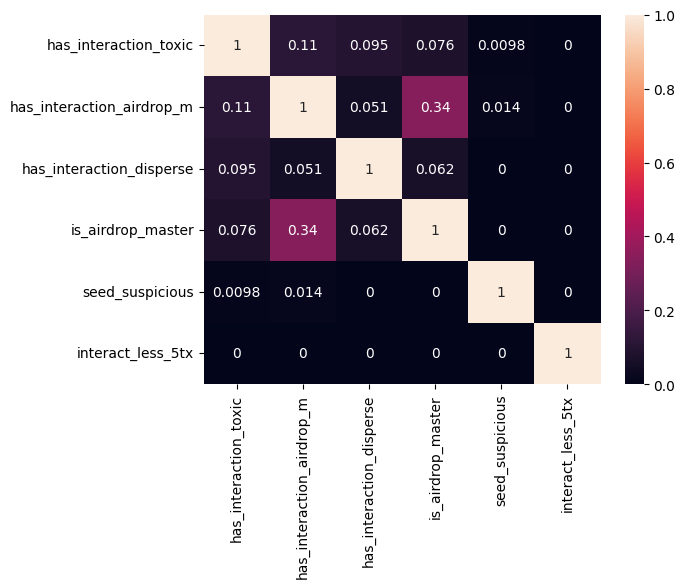

In [164]:
import seaborn as sns
sns.heatmap(jaccard_similarity, annot=True)

In [165]:
df_matching_address['flagged'] = df_matching_address[interaction_bool].sum(axis=1) > 0
df_interact_sus_2 = df_matching_address[df_matching_address['flagged'] == True]
print(f'Number of addresses that interacted with a suspicious contract or address: {df_interact_sus_2.shape[0]}')

Number of addresses that interacted with a suspicious contract or address: 401


In [166]:
df_vote_sus_2 = df_votes[df_votes['voter'].isin(df_interact_sus_2['address'])]
# count_unique_vote_grant = df_votes.drop_duplicates(subset=['grantAddress', 'voter']).groupby('grantAddress')['id'].count().sort_values(ascending=False).reset_index().head(10)
count_suspicious_vote_grant_2 = df_vote_sus_2['grantAddress'].value_counts().reset_index()
df_vote_grant_2 = count_unique_vote_grant.merge(count_suspicious_vote_grant_2, left_on='grantAddress', right_on='grantAddress', how='left').fillna(0).rename(columns={'id': 'count_unique_vote', 'count': 'count_suspicious_vote'})

In [167]:
df_vote_grant_2['percentage_suspicious_vote'] = df_vote_grant_2['count_suspicious_vote'] / df_vote_grant_2['count_unique_vote'] * 100
print(f'Number of suspicious votes {df_vote_sus_2.shape[0]} Number of projects voted: {df_vote_sus_2.grantAddress.nunique()}')
# Merge the project the user voted for and the projects 
gr_sus_2 = df_vote_grant_2.merge(df_application, left_on='grantAddress', right_on='metadata.application.recipient', how='left').drop_duplicates(subset='grantAddress').loc[:, ['grantAddress', 'metadata.application.project.title', 'percentage_suspicious_vote', 'count_suspicious_vote', 'roundId', 'status']].reset_index(drop=True).sort_values(by='percentage_suspicious_vote', ascending=False)
print(f'number of grants: {gr_sus.shape[0]}')
gr_sus_2.head(30)

Number of suspicious votes 1467 Number of projects voted: 12
number of grants: 12


,grantAddress,metadata.application.project.title,percentage_suspicious_vote,count_suspicious_vote,roundId,status
11,0x52277e5cf8df8ef51d9bd37d8d7553a72d378bef,Trustless zkMafia,24.149660,71,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
10,0x0b0e6486648fbbb8e9ab33e3ae9d0b44b6faa701,Zero Knowledge Podcast,21.614583,83,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
0,0x73dce9348a03975415c6fa5296e71c1abae61407,zkBob,19.544592,206,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
3,0x09dcfde0fff76ced37a78de5e7008e7401f92b3b,Proof of Innocence,19.410319,158,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
4,0xa0f92821c3ac20fa71a701efc5ca5d3c82e29fee,4EVERLAND,17.904509,135,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
1,0xe72ad4f94827abc45ed2bc02197fd6c091930492,Halo2 Backend for Noir,17.430168,156,0x12bb5bbbfe596dbc489d209299b8302c3300fa40,REJECTED
5,0x986dd13ccab3b637032ebedd30ef8a7fea4d6184,Sprintcheckout,17.029973,125,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
2,0x947f8a49640b4770a8c7fe3c1e69ffc974295448,ZeroPool,16.763679,144,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
8,0x23ada6e6a9e9d4ecddd185e3ec353163bceebf2a,PLUME: Pseudonymously Linked Unique Message En...,16.129032,105,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED
6,0x5b3920527cfe207100312f4685e048ee032fa391,zkREPL,15.395284,111,0x274554eb289004e15a7679123901b7f070dda0fa,APPROVED


In [168]:
boolean_to_keep = ['seed_suspicious', 'has_interaction_toxic', 'has_no_pool_interaction', 'has_interaction_tornado', 'has_interaction_disperse', 'is_airdrop_master', 'has_interaction_airdrop_m', 'interacted_other_ctbt', 'interact_less_5tx', 'flagged']

In [169]:
df_matching_address[boolean_to_keep].sum()

seed_suspicious                42
has_interaction_toxic          61
has_no_pool_interaction      1532
has_interaction_tornado        33
has_interaction_disperse       31
is_airdrop_master             122
has_interaction_airdrop_m     321
interacted_other_ctbt         320
interact_less_5tx               0
flagged                       401
dtype: int64

In [ ]:
df_votes.shape

In [170]:
final_merge = df_votes.merge(df_matching_address[boolean_to_keep + ['address']], left_on='voter', right_on='address', how='left')
print(f'number of squelched votes out of {final_merge.shape[0]}')
final_merge.shape[0] - final_merge[['coefficient']].sum() 

number of squelched votes out of 8605


coefficient    637
dtype: int64

In [171]:
print(df_votes.shape)
print(final_merge.shape)

(8605, 16)
(8605, 27)


C:\Users\DELL Admin\AppData\Local\Temp\ipykernel_1800\2681738413.py:7: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_votes_stephi = pd.read_csv(os.path.join(DATA_DIR_STEFI, CSV_STEPHI))


(81811, 19) votes stephi
(8605, 27) final merge
(8605, 29) votes merge


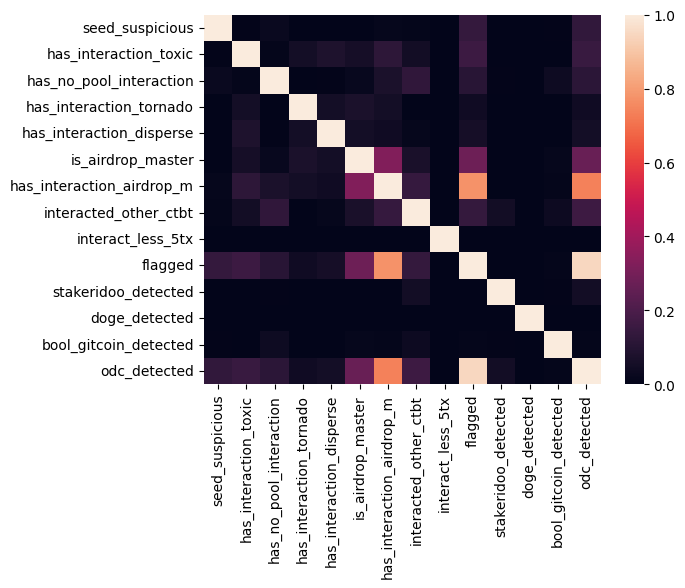

In [188]:
# Adding Stakeriddo and Gray flagged wallet

DATA_DIR_STEFI = os.path.join(current_dir.parent.parent, 'stefi')
CSV_STEPHI = 'sso_odc_analysis.csv'

# load data
df_votes_stephi = pd.read_csv(os.path.join(DATA_DIR_STEFI, CSV_STEPHI))
print(f'{df_votes_stephi.shape} votes stephi')
print(f'{final_merge.shape} final merge')
df_stephi_bool_voter = df_votes_stephi[['voter', 'stakeridoo_detected', 'doge_detected']]
df_merge = final_merge.merge(df_stephi_bool_voter.drop_duplicates(subset=['voter']), left_on='voter', right_on='voter', how='left')
print(f'{df_merge.shape} votes merge')

df_merge['bool_gitcoin_detected'] = np.logical_not(df_merge.success.astype(bool))
df_merge['stakeridoo_detected'].fillna(False, inplace=True)
df_merge['doge_detected'].fillna(False, inplace=True)
df_merge['odc_detected'] = np.logical_or(np.logical_or(df_merge['stakeridoo_detected'], df_merge['doge_detected']), df_merge['flagged'])

boolean_jaccard = boolean_to_keep + ['stakeridoo_detected', 'doge_detected', 'bool_gitcoin_detected', 'odc_detected']
jaccard_similarity_2 = jaccard_similarity_matrix(df_merge[boolean_jaccard])
sns.heatmap(jaccard_similarity_2)

df_merge['proposed_coeff'] = np.logical_not(np.logical_or(df_merge['odc_detected'], df_merge['bool_gitcoin_detected']))

df_merge.drop(columns=['bool_gitcoin_detected', 'address']).to_csv(f'../output_gitcoin/n_{CSV_GITCOIN_GRANTS}', index=False)

In [184]:
number_votes = df_merge.shape[0]
print(f'number of squelched votes out of {number_votes}')
print(df_merge[['success', 'proposed_coeff']].sum())
print(f'difference between the number of squelched votes and the number of votes with proposed coefficient: {number_votes - df_merge[["success", "proposed_coeff"]].sum()}')

number of squelched votes out of 73447
success           72618
proposed_coeff    61543
dtype: object
difference between the number of squelched votes and the number of votes with proposed coefficient: success             829
proposed_coeff    11904
dtype: object


In [181]:
unique_voter = df_merge.drop_duplicates('voter')
print(f'number of voters: {unique_voter.shape[0]}')
unique_voter[['success', 'proposed_coeff']].sum()

number of voters: 1848


success           1698
proposed_coeff    1333
dtype: object

In [185]:
df_merge.columns

Index(['id', 'projectId', 'applicationId', 'roundId', 'token', 'voter',
       'grantAddress', 'amount', 'amountUSD', 'coefficient', 'status',
       'last_score_timestamp', 'type', 'success', 'rawScore', 'threshold',
       'seed_suspicious', 'has_interaction_toxic', 'has_no_pool_interaction',
       'has_interaction_tornado', 'has_interaction_disperse',
       'is_airdrop_master', 'has_interaction_airdrop_m',
       'interacted_other_ctbt', 'interact_less_5tx', 'flagged', 'address',
       'stakeridoo_detected', 'doge_detected', 'bool_gitcoin_detected',
       'odc_detected', 'proposed_coeff'],
      dtype='object')

In [189]:
df_merge[boolean_jaccard].sum(axis=0)

seed_suspicious               202
has_interaction_toxic         234
has_no_pool_interaction      7476
has_interaction_tornado       113
has_interaction_disperse       83
is_airdrop_master             411
has_interaction_airdrop_m    1139
interacted_other_ctbt        1162
interact_less_5tx               0
flagged                      1467
stakeridoo_detected            78
doge_detected                   1
bool_gitcoin_detected         299
odc_detected                 1546
dtype: int64

In [193]:
df_merge['gitcoin_and_odc'] = np.logical_and(df_merge['bool_gitcoin_detected'], df_merge['odc_detected'])
df_merge['gitcoin_or_odc'] = np.logical_or(df_merge['bool_gitcoin_detected'], df_merge['odc_detected'])
df_merge['monetary_value_gitcoin'] = df_merge['amountUSD'] * df_merge['bool_gitcoin_detected']
df_merge['monetary_value_odc'] = df_merge['amountUSD'] * df_merge['odc_detected']
df_merge['monetary_value_gitcoin_and_odc'] = df_merge['amountUSD'] * df_merge['gitcoin_and_odc']
df_merge['monetary_value_gitcoin_or_odc'] = df_merge['amountUSD'] * df_merge['gitcoin_or_odc']

In [194]:
boolean_stats = boolean_jaccard + ['gitcoin_and_odc', 'gitcoin_or_odc', 'monetary_value_gitcoin', 'monetary_value_odc', 'monetary_value_gitcoin_and_odc', 'monetary_value_gitcoin_or_odc', 'amountUSD']
df_merge[boolean_stats].sum(axis=0)

seed_suspicious                     202.000000
has_interaction_toxic               234.000000
has_no_pool_interaction            7476.000000
has_interaction_tornado             113.000000
has_interaction_disperse             83.000000
is_airdrop_master                   411.000000
has_interaction_airdrop_m          1139.000000
interacted_other_ctbt              1162.000000
interact_less_5tx                     0.000000
flagged                            1467.000000
stakeridoo_detected                  78.000000
doge_detected                         1.000000
bool_gitcoin_detected               299.000000
odc_detected                       1546.000000
gitcoin_and_odc                      21.000000
gitcoin_or_odc                     1824.000000
monetary_value_gitcoin             2531.808523
monetary_value_odc                 8977.551597
monetary_value_gitcoin_and_odc      187.114153
monetary_value_gitcoin_or_odc     11322.245966
amountUSD                         31265.441079
dtype: float6